## this notebook is for check intermediate files of merline speech synthesis system.

**following is to check intermiate files**  
in folder acoustic_model/data/mgc acoustic_model/data/lf0 acoustic_model/data/lf0

In [1]:
%pylab inline
rcParams["figure.figsize"] = (16,5)
from scipy.io import wavfile
import pyworld
import pysptk
import IPython
from IPython.display import Audio
import librosa
import librosa.display

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy

class   BinaryIOCollection(object):

    def load_binary_file(self, file_name, dimension):
        fid_lab = open(file_name, 'rb')
        features = numpy.fromfile(fid_lab, dtype=numpy.float32)
        fid_lab.close()
        assert features.size % float(dimension) == 0.0,'specified dimension %s not compatible with data'%(dimension)
        features = features[:(dimension * (features.size // dimension))]
        features = features.reshape((-1, dimension))

        return  features

    def array_to_binary_file(self, data, output_file_name):
        data = numpy.array(data, 'float32')

        fid = open(output_file_name, 'wb')
        data.tofile(fid)
        fid.close()

    def load_binary_file_frame(self, file_name, dimension):
        fid_lab = open(file_name, 'rb')
        features = numpy.fromfile(fid_lab, dtype=numpy.float32)
        fid_lab.close()
        assert features.size % float(dimension) == 0.0,'specified dimension %s not compatible with data'%(dimension)
        frame_number = features.size // dimension
        features = features[:(dimension * frame_number)]
        features = features.reshape((-1, dimension))

        return  features, frame_number

In [3]:
import os

In [4]:
io_funcs = BinaryIOCollection()

In [16]:
mgc_data_dir = "/run/user/1000/gvfs/sftp:host=137.189.34.16,port=10622,user=gyzhang/home/gyzhang/merlin/egs/speaker_adaptation/s4/experiments/vctk_avm/acoustic_model/data/mgc"
lf0_data_dir = "/run/user/1000/gvfs/sftp:host=137.189.34.16,port=10622,user=gyzhang/home/gyzhang/merlin/egs/speaker_adaptation/s4/experiments/vctk_avm/acoustic_model/data/lf0"
bap_data_dir = "/run/user/1000/gvfs/sftp:host=137.189.34.16,port=10622,user=gyzhang/home/gyzhang/merlin/egs/speaker_adaptation/s4/experiments/vctk_avm/acoustic_model/data/bap"
mgc_file_name = os.path.join(mgc_data_dir, 'p225_001.mgc')
lf0_file_name = os.path.join(lf0_data_dir, 'p225_001.lf0')
bap_file_name = os.path.join(bap_data_dir, 'p225_001.bap')

In [17]:
mgc_features, frame_number = io_funcs.load_binary_file_frame(mgc_file_name, 60)

In [18]:
lf0_features, frame_number = io_funcs.load_binary_file_frame(lf0_file_name, 1)

In [19]:
bap_features, frame_number = io_funcs.load_binary_file_frame(bap_file_name, 1)

In [20]:
lf0_features.shape

(411, 1)

In [21]:
nonzero_indices = numpy.nonzero(lf0_features)
f0 = numpy.exp(lf0_features[nonzero_indices])

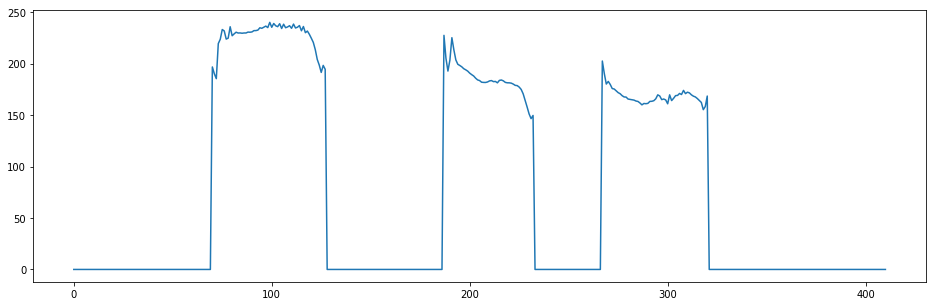

In [22]:
plot(f0)

In [26]:
alpha=pysptk.util.mcepalpha(16000)
fs=16000
spectrogram_recover = pysptk.mc2sp(mgc_features.astype(np.float64), fftlen=1024, alpha=0.58)
aperiodicity_recover = pyworld.decode_aperiodicity(bap_features.astype(np.float64), fs, 1024)
generated_waveform = pyworld.synthesize(f0.astype(np.float64), spectrogram_recover,aperiodicity_recover, fs, 5)

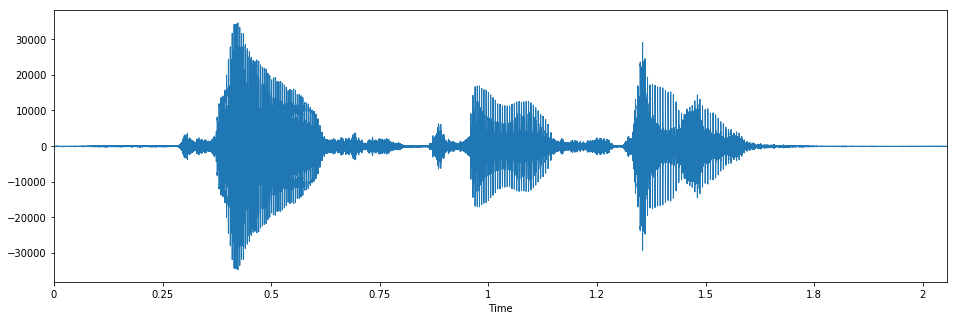

In [27]:
librosa.display.waveplot(np.float32(generated_waveform), sr=fs,max_points=60000)
Audio(generated_waveform, rate=fs)

**following is to check intermiate files**  
in folder acoustic_model/inter_moudle nn_mgc_lf0_vuv_bap_187

In [38]:
# cmp_data_dir = "/run/user/1000/gvfs/sftp:host=137.189.34.16,port=10622,user=gyzhang/home/gyzhang/merlin/egs/blz/s1/experiments/blz/acoustic_model/gen/feed_forward_6_tanh"
cmp_data_dir = "/run/user/1000/gvfs/sftp:host=137.189.34.16,port=10622,user=gyzhang/home/gyzhang/merlin/egs/blz/s1/experiments/blz/test_synthesis/wav"
ref_cmp_data_dir = "/run/user/1000/gvfs/sftp:host=137.189.34.16,port=10622,user=gyzhang/home/gyzhang/merlin/egs/blz/s1/experiments/blz/acoustic_model/inter_module/nn_mgc_lf0_vuv_bap_187"
ref_cmp_file_name = os.path.join(ref_cmp_data_dir,'100442.cmp')
cmp_file_name = os.path.join(cmp_data_dir, '100442-1.cmp')

In [39]:
cmp_features, cmp_frame_number = io_funcs.load_binary_file_frame(cmp_file_name, 187)
ref_cmp_features, ref_cmp_frame_number = io_funcs.load_binary_file_frame(ref_cmp_file_name, 187)

In [40]:
def decompose_cmp(cmp_features):
    mgc_features = cmp_features[:,0:60]
    vuv = cmp_features[:,183]
    lf0_features = cmp_features[:,180]
    bap_features = cmp_features[:,184]
    f0_features = np.exp(lf0_features)
    zeros_index = np.where(vuv < 0.5)
    f0_features[zeros_index] = 0
    f0_features = f0_features.astype(np.float64)
    return mgc_features, bap_features, f0_features

In [41]:
mgc_features,bap_features,f0_features = decompose_cmp(cmp_features)
ref_mgc_features,ref_bap_features,ref_f0_features = decompose_cmp(ref_cmp_features)

In [44]:
mgc_features.shape

(502, 60)

In [45]:
bap_features.shape

(502,)

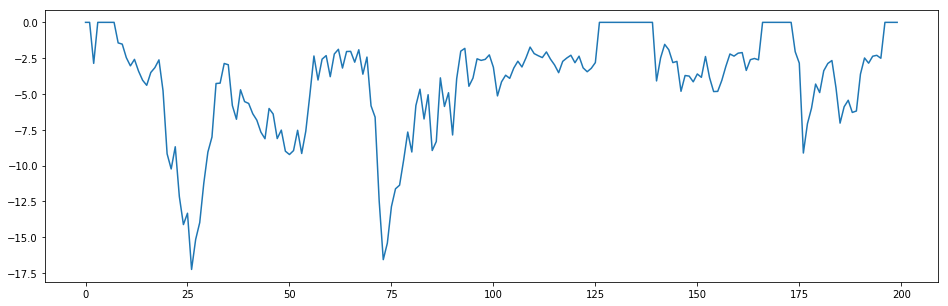

In [31]:
plot(ref_bap_features[0:200])

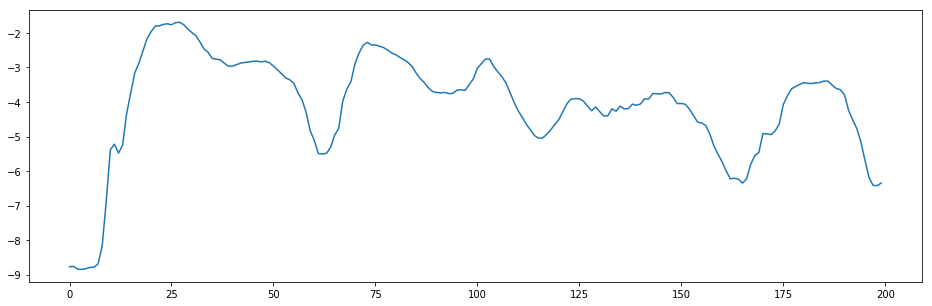

In [34]:
plot(ref_mgc_features[0:200,0])

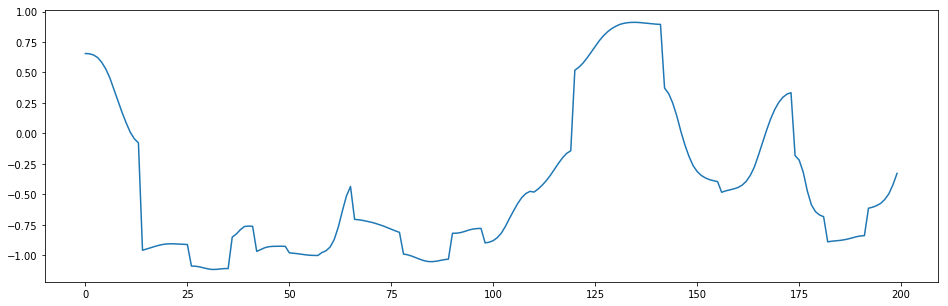

In [32]:
plot(bap_features[0:200])

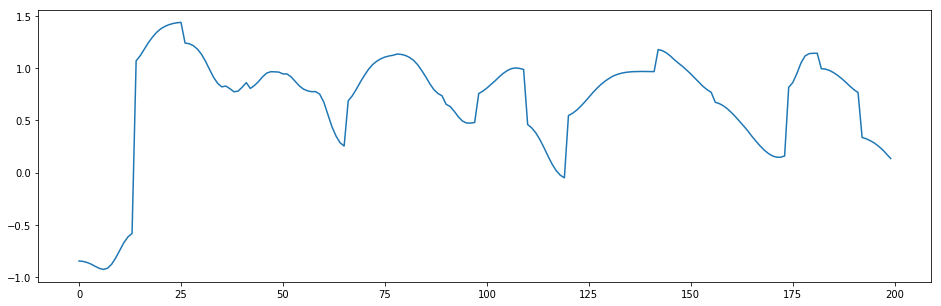

In [35]:
plot(mgc_features[0:200,0])

In [52]:
ref_ap = pyworld.decode_aperiodicity(ref_bap_features.astype(np.float64).reshape(-1,1)[0:502,:], 16000, 1024)
ref_sp = pysptk.mc2sp(ref_mgc_features.astype(np.float64)[0:502,:], fftlen=1024, alpha=pysptk.util.mcepalpha(16000)
)
wav = pyworld.synthesize(f0_features,ref_sp,ref_ap, 16000,5)

In [53]:
Audio(wav,rate=16000)

In [42]:
ap = pyworld.decode_aperiodicity(bap_features.astype(np.float64).reshape(-1,1), 16000, 1024)
sp = pysptk.mc2sp(mgc_features.astype(np.float64), fftlen=1024, alpha=pysptk.util.mcepalpha(16000)
)
wav = pyworld.synthesize(f0_features,sp,ap, 16000,5)

In [48]:
Audio(wav,rate=16000)

**following is to check intermiate files**  
in folder binary_label_332/

In [36]:
ref_binary_label_332_dir = "/run/user/1000/gvfs/sftp:host=137.189.34.16,port=10622,user=gyzhang/home/gyzhang/merlin/egs/blz/s1/experiments/blz/acoustic_model/inter_module/binary_label_332"
ref_remove_silence_binary_label_332_dir = "/run/user/1000/gvfs/sftp:host=137.189.34.16,port=10622,user=gyzhang/home/gyzhang/merlin/egs/blz/s1/experiments/blz/acoustic_model/inter_module/nn_no_silence_lab_332"
ref_no_silence_norm_dir = "/run/user/1000/gvfs/sftp:host=137.189.34.16,port=10622,user=gyzhang/home/gyzhang/merlin/egs/blz/s1/experiments/blz/acoustic_model/inter_module/nn_no_silence_lab_norm_332"
ref_lab_file_name = os.path.join(ref_binary_label_332_dir,'100442.lab')
ref_remove_sil_lab_file = os.path.join(ref_remove_silence_binary_label_332_dir,'100442.lab')
ref_no_sil_norm_lab_file = os.path.join(ref_no_silence_norm_dir,'100442.lab')

In [9]:
lin_features, frame_number = io_funcs.load_binary_file_frame(ref_lab_file_name, 332)

In [31]:
no_sil_lin_features, no_sil_frame_number = io_funcs.load_binary_file_frame(ref_remove_sil_lab_file, 332)

In [37]:
no_sil_norm_lin_features, no_sil_frame_number = io_funcs.load_binary_file_frame(ref_no_sil_norm_lab_file, 332)

In [38]:
no_sil_frame_number

10020

In [41]:
np.where(no_sil_lin_features[105,:]==1)

(array([  1,  19,  22,  23,  49,  69, 101, 160, 177, 199, 206, 209, 214,
        243, 292, 300, 306, 308, 315, 318]),)

In [43]:
np.where(no_sil_norm_lin_features[105,:]==0.99)

(array([  1,  19,  23,  49,  69, 101, 160, 177, 199, 206, 209, 214, 243, 292]),)

% following check normalization files

In [45]:
lin_norm_file = "/run/user/1000/gvfs/sftp:host=137.189.34.16,port=10622,user=gyzhang/home/gyzhang/merlin/egs/blz/s1/experiments/blz/acoustic_model/inter_module/label_norm_HTS_332.dat"

In [47]:
min_max_vector, frame_number = io_funcs.load_binary_file_frame(lin_norm_file, 1)
min_max_vector = numpy.reshape(min_max_vector, (-1, ))
min_vector = min_max_vector[0:frame_number//2]
max_vector = min_max_vector[frame_number//2:]

In [50]:
np.where(max_vector[:]==0)

(array([  3,  35,  36,  58,  70,  71, 105, 106, 140, 141, 175, 176, 196,
        265, 293]),)